<a href="https://colab.research.google.com/github/engjz/Optimizacion-portafolio-criptos/blob/main/opt_criptos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip cache purge

!pip install pyportfolioopt==1.5.5
!pip install plotly
!pip install tqdm
!pip install keyboard
!pip install pandas_datareader
!pip install yfinance
!pip install pytickersymbols
!pip install yahooquery
!pip install crix
!pip install python-coinmarketcap
!pip install xlrd
!pip install pandas==1.3.3
!pip install matplotlib==3.5.0
!pip install --upgrade seaborn matplotlib #Upgrade seaborn to ensure compatibility.
!pip install --force-reinstall seaborn #Reinstall seaborn in case of file corruption.


from pandas_datareader import data as pdr

from yahooquery import Screener

from pypfopt.discrete_allocation import  get_latest_prices, DiscreteAllocation
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

from pypfopt import discrete_allocation
#from pypfopt import plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-deep")

from datetime import datetime
from tqdm import tqdm

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import yfinance as yf
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px

import coinmarketcapapi
import requests
import xlrd
import copy
import os


Files removed: 155
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
crix 1.8.2 requires requests~=2.21.0, but you have requests 2.32.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
langchain 0.3.16 requires aiohttp<4.0.0,>=3.8.3, but you have aiohttp 3.5.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.34.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yahooquery 2.3.7 requires requests<3.0.0,>=2.31.0, but you have requests 2.21.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.21.0 which is incompatible.
langchain 0.3.16 requires aiohttp<4.0.0,>=3.8.3, but you have aiohttp 3.5.4 which is incompatible.
yfinance 0.2.52 requires requests>=2.31, but you have requests 2.21.0 which is incompatible.
tweepy 4.14.0 requires requests<3,>=2.27.0, but you have requests 2.21.0 which is incompatible.
ten

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 59.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 48.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.5.0-cp311-cp311-linux_x86_64.whl size=11118094 sha256=aabe30381507aaa18aad35eb0ee0ce27fc73196d6d8ee50ebdf98ed12016405b
  Stored in directory: /root/.cache/pip/wheels/db/af/5a/22e418cb68b6b39226fa769754c0f8880d706f42

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.19.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.34.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.34.0 requires requests>=2.27.1, but you have requests 2.21.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.0 MB/s eta 0:00:00
  Using cached matplotlib-3.10.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
#PRECIOS DE LAS CRYPTOCURRENCIES

s = Screener()
data = s.get_screeners('all_cryptocurrencies_us', count=250)

# data is in the quotes key
dicts =data['all_cryptocurrencies_us']['quotes']
#Otros filtros criptográficos que podría usar son: all_cryptocurrencies_au, all_cryptocurrencies_ca,
#all_cryptocurrencies_eu, all_cryptocurrencies_gby all_cryptocurrencies_in.
symbols = [d['symbol'] for d in dicts]
print(symbols)

start = "2020-01-28"
end= "2025-01-28"
#end = datetime.today().strftime('%Y-%m-%d')

def datosYahoo(nombresActivos,inicio,fin):
    df_p = pd.DataFrame()
    for i in nombresActivos:
        data = yf.download(i, start=inicio, end=fin)
        df_p[i] = data['Close']
        #df_p[i] = data['Price']
        if df_p[i].min()<=1:
            del df_p[i]
    return df_p

df_prices = datosYahoo(symbols,start,end)
df_prices.index = pd.to_datetime(df_prices.index)
df_prices

['BTC-USD', 'ETH-USD', 'XRP-USD', 'USDT-USD', 'SOL-USD', 'BNB-USD', 'USDC-USD', 'DOGE-USD', 'ADA-USD', 'STETH-USD', 'WTRX-USD', 'TRX-USD', 'LINK-USD', 'AVAX-USD', 'WSTETH-USD', 'WBTC-USD', 'XLM-USD', 'SUI20947-USD', 'HBAR-USD', 'TON11419-USD', 'SHIB-USD', 'WETH-USD', 'LTC-USD', 'DOT-USD', 'LEO-USD', 'HYPE32196-USD', 'BCH-USD', 'BGB-USD', 'UNI7083-USD', 'USDS33039-USD', 'WBETH-USD', 'BTCB-USD', 'WEETH-USD', 'USDE29470-USD', 'PEPE24478-USD', 'NEAR-USD', 'OM-USD', 'DAI-USD', 'TRUMP35336-USD', 'TRUMP-OFFICIAL-USD', 'ONDO-USD', 'AAVE-USD', 'APT21794-USD', 'ICP-USD', 'SUSDE-USD', 'XMR-USD', 'ETC-USD', 'MNT27075-USD', 'JITOSOL-USD', 'VET-USD', 'TAO22974-USD', 'POL28321-USD', 'CRO-USD', 'OKB-USD', 'KAS-USD', 'ALGO-USD', 'RENDER-USD', 'FIL-USD', 'ARB11841-USD', 'FET-USD', 'ATOM-USD', 'ENA-USD', 'CBBTC32994-USD', 'RAY-USD', 'GT-USD', 'TIA22861-USD', 'STX4847-USD', 'OP-USD', 'INJ-USD', 'THETA-USD', 'IMX10603-USD', 'LBTC33652-USD', 'BONK-USD', 'LDO-USD', 'BNSOL-USD', 'JUP29210-USD', 'FDUSD-USD', '

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

BTC-USD      ETH-USD     BNB-USD    STETH-USD   LINK-USD  \
Date                                                                         
2020-01-28    9358.589844   176.370316   18.115135          NaN   2.655339   
2020-01-29    9316.629883   175.050339   17.912777          NaN   2.785324   
2020-01-30    9508.993164   184.690475   18.590408          NaN   2.912988   
2020-01-31    9350.529297   180.160172   18.210979          NaN   2.823791   
2020-02-01    9392.875000   183.673950   18.218321          NaN   2.838953   
...                   ...          ...         ...          ...        ...   
2025-01-23  103960.171875  3334.714111  690.203735  3333.453125  25.655148   
2025-01-24  104819.484375  3309.554932  680.213196  3304.290771  25.189669   
2025-01-25  104714.648438  3317.269531  686.268494  3311.795410  24.924709   
2025-01-26  102682.500000  3236.134277  666.763794  3232.588379  24.911713   
2025-01-27  102087.687500  3178.920410  679.793335  3169.812012  24.149340   

             AVAX-USD   WSTETH-USD       WBTC-USD     WETH-USD     LTC-USD  \
Date                                                                         
2020-01-28        NaN          NaN    9432.914062   176.318497   60.671818   
2020-01-29        NaN          NaN    9362.487305   175.134094   60.077934   
2020-01-30        NaN          NaN    9504.333984   184.822586   68.159065   
2020-01-31        NaN          NaN    9358.923828   180.162888   67.879494   
2020-02-01        NaN          NaN    9428.838867   183.795258   70.820015   
...               ...          ...            ...          ...         ...   
2025-01-23  35.591885  3925.103027  104070.562500  3316.209717  116.507568   
2025-01-24  35.338051  3948.424805  104610.890625  3317.219971  118.695541   
2025-01-25  36.621078  3961.420166  104627.398438  3328.554688  123.983070   
2025-01-26  35.857327  3894.425781  102623.281250  3269.676758  117.206612   
2025-01-27  34.199623  3770.726074  101765.375000  3168.899658  114.898705   

            ...  SOL16116-USD  USDY29256-USD  PRIME23711-USD  \
Date        ...                                                
2020-01-28  ...           NaN            NaN             NaN   
2020-01-29  ...           NaN            NaN             NaN   
2020-01-30  ...           NaN            NaN             NaN   
2020-01-31  ...           NaN            NaN             NaN   
2020-02-01  ...           NaN            NaN             NaN   
...         ...           ...            ...             ...   
2025-01-23  ...    253.606598       1.069726       11.399518   
2025-01-24  ...    253.313110       1.069870       10.277165   
2025-01-25  ...    257.198395       1.068921       10.296335   
2025-01-26  ...    241.305557       1.069518        9.771358   
2025-01-27  ...    234.812714       1.070666        9.646018   

            MELANIA35347-USD  MELANIA-OFFICIAL-USD  SFRXETH-USD  IO29835-USD  \
Date                                                                           
2020-01-28               NaN                   NaN          NaN          NaN   
2020-01-29               NaN                   NaN          NaN          NaN   
2020-01-30               NaN                   NaN          NaN          NaN   
2020-01-31               NaN                   NaN          NaN          NaN   
2020-02-01               NaN                   NaN          NaN          NaN   
...                      ...                   ...          ...          ...   
2025-01-23          2.750945                   NaN  3598.416992     3.169917   
2025-01-24          2.466758                   NaN  3685.945557     3.066274   
2025-01-25          2.737379                   NaN  3686.168213     3.145104   
2025-01-26          2.394750                   NaN  3647.681396     3.009109   
2025-01-27          2.576411                   NaN  3468.635010     2.920408   

              LSETH-USD  ETHFI-USD  CLISBNB-USD  
Date                                             
2020-01-28    

In [6]:
#LIMPIEZA DE DATOS CRIPTOS

nan_value = float("NaN")
df_prices.replace("", nan_value, inplace=True)
df_prices.dropna(how='all', axis=1, inplace=True)
df_prices.fillna(method='backfill', inplace=True)
#df_prices.drop_duplicates(inplace = True)
df_prices.index = df_prices.index.tz_localize(None)
df_prices.shape

(1827, 82)

In [7]:
#GRAFICO DE LAS CRIPTOMONEDAS

fig_price = px.line(df_prices, title= 'Precio de las Activos')
fig_price.show()

In [8]:
# RETORNO LOGARITMICO

df_log = np.log(df_prices).diff()
df_log = df_log.dropna()
df_log.head()

BTC-USD   ETH-USD   BNB-USD  STETH-USD  LINK-USD  AVAX-USD  \
Date                                                                      
2020-01-29 -0.004494 -0.007512 -0.011234        0.0  0.047792       0.0   
2020-01-30  0.020437  0.053608  0.037132        0.0  0.044815       0.0   
2020-01-31 -0.016805 -0.024835 -0.020621        0.0 -0.031099       0.0   
2020-02-01  0.004518  0.019316  0.000403        0.0  0.005355       0.0   
2020-02-02 -0.005178  0.026559  0.012538        0.0 -0.002247       0.0   

            WSTETH-USD  WBTC-USD  WETH-USD   LTC-USD  ...  SSOL32591-USD  \
Date                                                  ...                  
2020-01-29         0.0 -0.007494 -0.006740 -0.009837  ...            0.0   
2020-01-30         0.0  0.015037  0.053844  0.126202  ...            0.0   
2020-01-31         0.0 -0.015418 -0.025535 -0.004110  ...            0.0   
2020-02-01         0.0  0.007443  0.019961  0.042408  ...            0.0   
2020-02-02         0.0 -0.003885  0.025448 -0.008344  ...            0.0   

            SOL16116-USD  USDY29256-USD  PRIME23711-USD  MELANIA35347-USD  \
Date                                                                        
2020-01-29           0.0            0.0             0.0               0.0   
2020-01-30           0.0            0.0             0.0               0.0   
2020-01-31           0.0            0.0             0.0               0.0   
2020-02-01           0.0            0.0             0.0               0.0   
2020-02-02           0.0            0.0             0.0               0.0   

            SFRXETH-USD  IO29835-USD  LSETH-USD  ETHFI-USD  CLISBNB-USD  
Date                                                                     
2020-01-29          0.0          0.0        0.0        0.0          0.0  
2020-01-30          0.0          0.0        0.0        0.0          0.0  
2020-01-31          0.0          0.0        0.0        0.0          0.0  
2020-02-01          0.0          0.0        0.0        0.0          0.0  
2020-02-02          0.0          0.0        0.0        0.0          0.0  

[5 rows x 82 columns]

In [9]:
# CORRELACION

#correlation_mat = df_log.corr().round(2) # round to 2 decimal places
correlation_mat = df_log.corr()
correlation_mat

BTC-USD   ETH-USD   BNB-USD  STETH-USD  LINK-USD  AVAX-USD  \
BTC-USD      1.000000  0.819243  0.691860   0.563220  0.678140  0.390386   
ETH-USD      0.819243  1.000000  0.720612   0.729729  0.780799  0.429936   
BNB-USD      0.691860  0.720612  1.000000   0.539035  0.653653  0.464227   
STETH-USD    0.563220  0.729729  0.539035   1.000000  0.573469  0.511056   
LINK-USD     0.678140  0.780799  0.653653   0.573469  1.000000  0.440927   
...               ...       ...       ...        ...       ...       ...   
SFRXETH-USD       NaN       NaN       NaN        NaN       NaN       NaN   
IO29835-USD       NaN       NaN       NaN        NaN       NaN       NaN   
LSETH-USD         NaN       NaN       NaN        NaN       NaN       NaN   
ETHFI-USD         NaN       NaN       NaN        NaN       NaN       NaN   
CLISBNB-USD       NaN       NaN       NaN        NaN       NaN       NaN   

             WSTETH-USD  WBTC-USD  WETH-USD   LTC-USD  ...  SSOL32591-USD  \
BTC-USD        0.255877  0.986228  0.796145  0.812837  ...            NaN   
ETH-USD        0.292792  0.813973  0.968293  0.832498  ...            NaN   
BNB-USD        0.206115  0.684493  0.692741  0.691770  ...            NaN   
STETH-USD      0.392326  0.562778  0.710790  0.622284  ...            NaN   
LINK-USD       0.213070  0.672697  0.744875  0.740516  ...            NaN   
...                 ...       ...       ...       ...  ...            ...   
SFRXETH-USD         NaN       NaN       NaN       NaN  ...            NaN   
IO29835-USD         NaN       NaN       NaN       NaN  ...            NaN   
LSETH-USD           NaN       NaN       NaN       NaN  ...            NaN   
ETHFI-USD           NaN       NaN       NaN       NaN  ...            NaN   
CLISBNB-USD         NaN       NaN       NaN       NaN  ...            NaN   

             SOL16116-USD  USDY29256-USD  PRIME23711-USD  MELANIA35347-USD  \
BTC-USD          0.126864            NaN             NaN               NaN   
ETH-USD          0.149537            NaN             NaN               NaN   
BNB-USD          0.113485            NaN             NaN               NaN   
STETH-USD        0.200415            NaN             NaN               NaN   
LINK-USD         0.113731            NaN             NaN               NaN   
...                   ...            ...             ...               ...   
SFRXETH-USD           NaN            NaN             NaN               NaN   
IO29835-USD           NaN            NaN             NaN               NaN   
LSETH-USD             NaN            NaN             NaN               NaN   
ETHFI-USD             NaN            NaN             NaN               NaN   
CLISBNB-USD           NaN            NaN             NaN               NaN   

             SFRXETH-USD  IO29835-USD  LSETH-USD  ETHFI-USD  CLISBNB-USD  
BTC-USD              NaN          NaN        NaN        NaN          NaN  
ETH-USD              NaN          NaN        NaN        NaN          NaN  
BNB-USD              NaN          NaN        NaN        NaN          NaN  
STETH-USD            NaN          NaN        NaN        NaN          NaN  
LINK-USD             NaN          NaN        NaN        NaN          NaN  
...                  ...          ...        ...        ...          ...  
SFRXETH-USD          NaN          NaN        NaN        NaN          NaN  
IO29835-USD          NaN          NaN        NaN        NaN          NaN  
LSETH-USD            NaN          NaN        NaN        NaN          NaN  
ETHFI-USD            NaN          NaN        NaN        NaN          NaN  
CLISBNB-USD          NaN          NaN        NaN        NaN          NaN  

[82 rows x 82 columns]

In [10]:
# MATRIZ DE CORRELACION

fig_corr = px.imshow(correlation_mat, title = 'Correlation between Crypto Stocks')
fig_corr.show()

In [11]:
# MENOS CORRELACIONADOS

from collections import defaultdict
from itertools import count

correlation = correlation_mat.abs().unstack()
sorted_values = pd.DataFrame(correlation.sort_values(kind="quicksort"), index= None)
sorted_values = sorted_values[(sorted_values[0] > 0) & (sorted_values[0] < 0.5)]
sorted_values.drop_duplicates()

criptodic = defaultdict(list)

for k,v in sorted_values.index:
    criptodic[k].append(v)

criptos = []

for k,v in criptodic.items():
    criptos.append(k)
    for i in v:
        if i not in criptos:
            criptos.append(i)

unique_list = list(set(criptos))
print(len(unique_list))

dfc = df_log[unique_list]
dfc


38


BNB-USD  VBTC-USD  WBTC-USD  PAXG-USD   ETC-USD   QNT-USD  \
Date                                                                     
2020-01-29 -0.011234  0.000000 -0.007494  0.001721  0.066226  0.069108   
2020-01-30  0.037132  0.000000  0.015037  0.000721 -0.003701 -0.064565   
2020-01-31 -0.020621  0.000000 -0.015418  0.002079 -0.082622 -0.019677   
2020-02-01  0.000403  0.000000  0.007443 -0.000953  0.021080  0.102811   
2020-02-02  0.012538  0.000000 -0.003885  0.007010 -0.013341  0.003629   
...              ...       ...       ...       ...       ...       ...   
2022-02-07  0.032095  0.036626  0.037159  0.003806  0.087945  0.136119   
2022-02-08 -0.058098  0.004689  0.005374  0.003332 -0.016731 -0.052485   
2022-02-09  0.032939  0.006223  0.007282  0.004751  0.052664  0.019838   
2022-02-10 -0.017542 -0.017603 -0.020155 -0.002864  0.018091 -0.069320   
2022-02-11 -0.036046 -0.012452 -0.026786  0.019404 -0.052260 -0.080859   

             ENS-USD  LINK-USD  WBNB-USD  BTCB-USD  ...   LTC-USD   ETH-USD  \
Date                                                ...                       
2020-01-29  0.000000  0.047792  0.000000 -0.009643  ... -0.009837 -0.007512   
2020-01-30  0.000000  0.044815  0.000000  0.018955  ...  0.126202  0.053608   
2020-01-31  0.000000 -0.031099  0.000000 -0.010297  ... -0.004110 -0.024835   
2020-02-01  0.000000  0.005355  0.000000 -0.005146  ...  0.042408  0.019316   
2020-02-02  0.000000 -0.002247  0.000000 -0.022421  ... -0.008344  0.026559   
...              ...       ...       ...       ...  ...       ...       ...   
2022-02-07  0.046107  0.045372  0.034060  0.036616  ...  0.073076  0.027420   
2022-02-08 -0.077681 -0.024151 -0.057248  0.004679  ... -0.022990 -0.006341   
2022-02-09  0.047729  0.011675  0.029225  0.006212  ...  0.045093  0.036737   
2022-02-10 -0.106936 -0.061793 -0.016560 -0.017613  ... -0.036938 -0.051294   
2022-02-11 -0.097413 -0.079624 -0.037727 -0.027413  ... -0.069400 -0.050003   

             XMR-USD   MKR-USD   DOT-USD  WSTETH-USD  WETH-USD  ATOM-USD  \
Date                                                                       
2020-01-29  0.033681 -0.017807  0.000000    0.000000 -0.006740 -0.038625   
2020-01-30  0.068108  0.054459  0.000000    0.000000  0.053844  0.000477   
2020-01-31 -0.039312 -0.011744  0.000000    0.000000 -0.025535 -0.005781   
2020-02-01  0.017191  0.012176  0.000000    0.000000  0.019961 -0.003002   
2020-02-02  0.022947  0.011988  0.000000    0.000000  0.025448  0.006924   
...              ...       ...       ...         ...       ...       ...   
2022-02-07  0.062056  0.002568  0.020836    0.030966  0.027868  0.013453   
2022-02-08 -0.031556 -0.018479 -0.030663   -0.008353 -0.007980 -0.038422   
2022-02-09  0.036907  0.016232  0.011062    0.040355  0.037580  0.013748   
2022-02-10 -0.033868 -0.063182 -0.060883   -0.051839 -0.054449 -0.058755   
2022-02-11 -0.061919 -0.042553 -0.084531   -0.052121 -0.047997 -0.093070   

            XAUT-USD   KSM-USD  
Date                            
2020-01-29  0.000000 -0.026505  
2020-01-30  0.000000 -0.051730  
2020-01-31  0.000000  0.088826  
2020-02-01  0.000000 -0.013854  
2020-02-02  0.000000  0.070874  
...              ...       ...  
2022-02-07 -0.000451  0.012099  
2022-02-08  0.002206 -0.029652  
2022-02-09  0.004852 -0.002178  
2022-02-10 -0.005614 -0.068590  
2022-02-11  0.010645 -0.085139  

[745 rows x 38 columns]

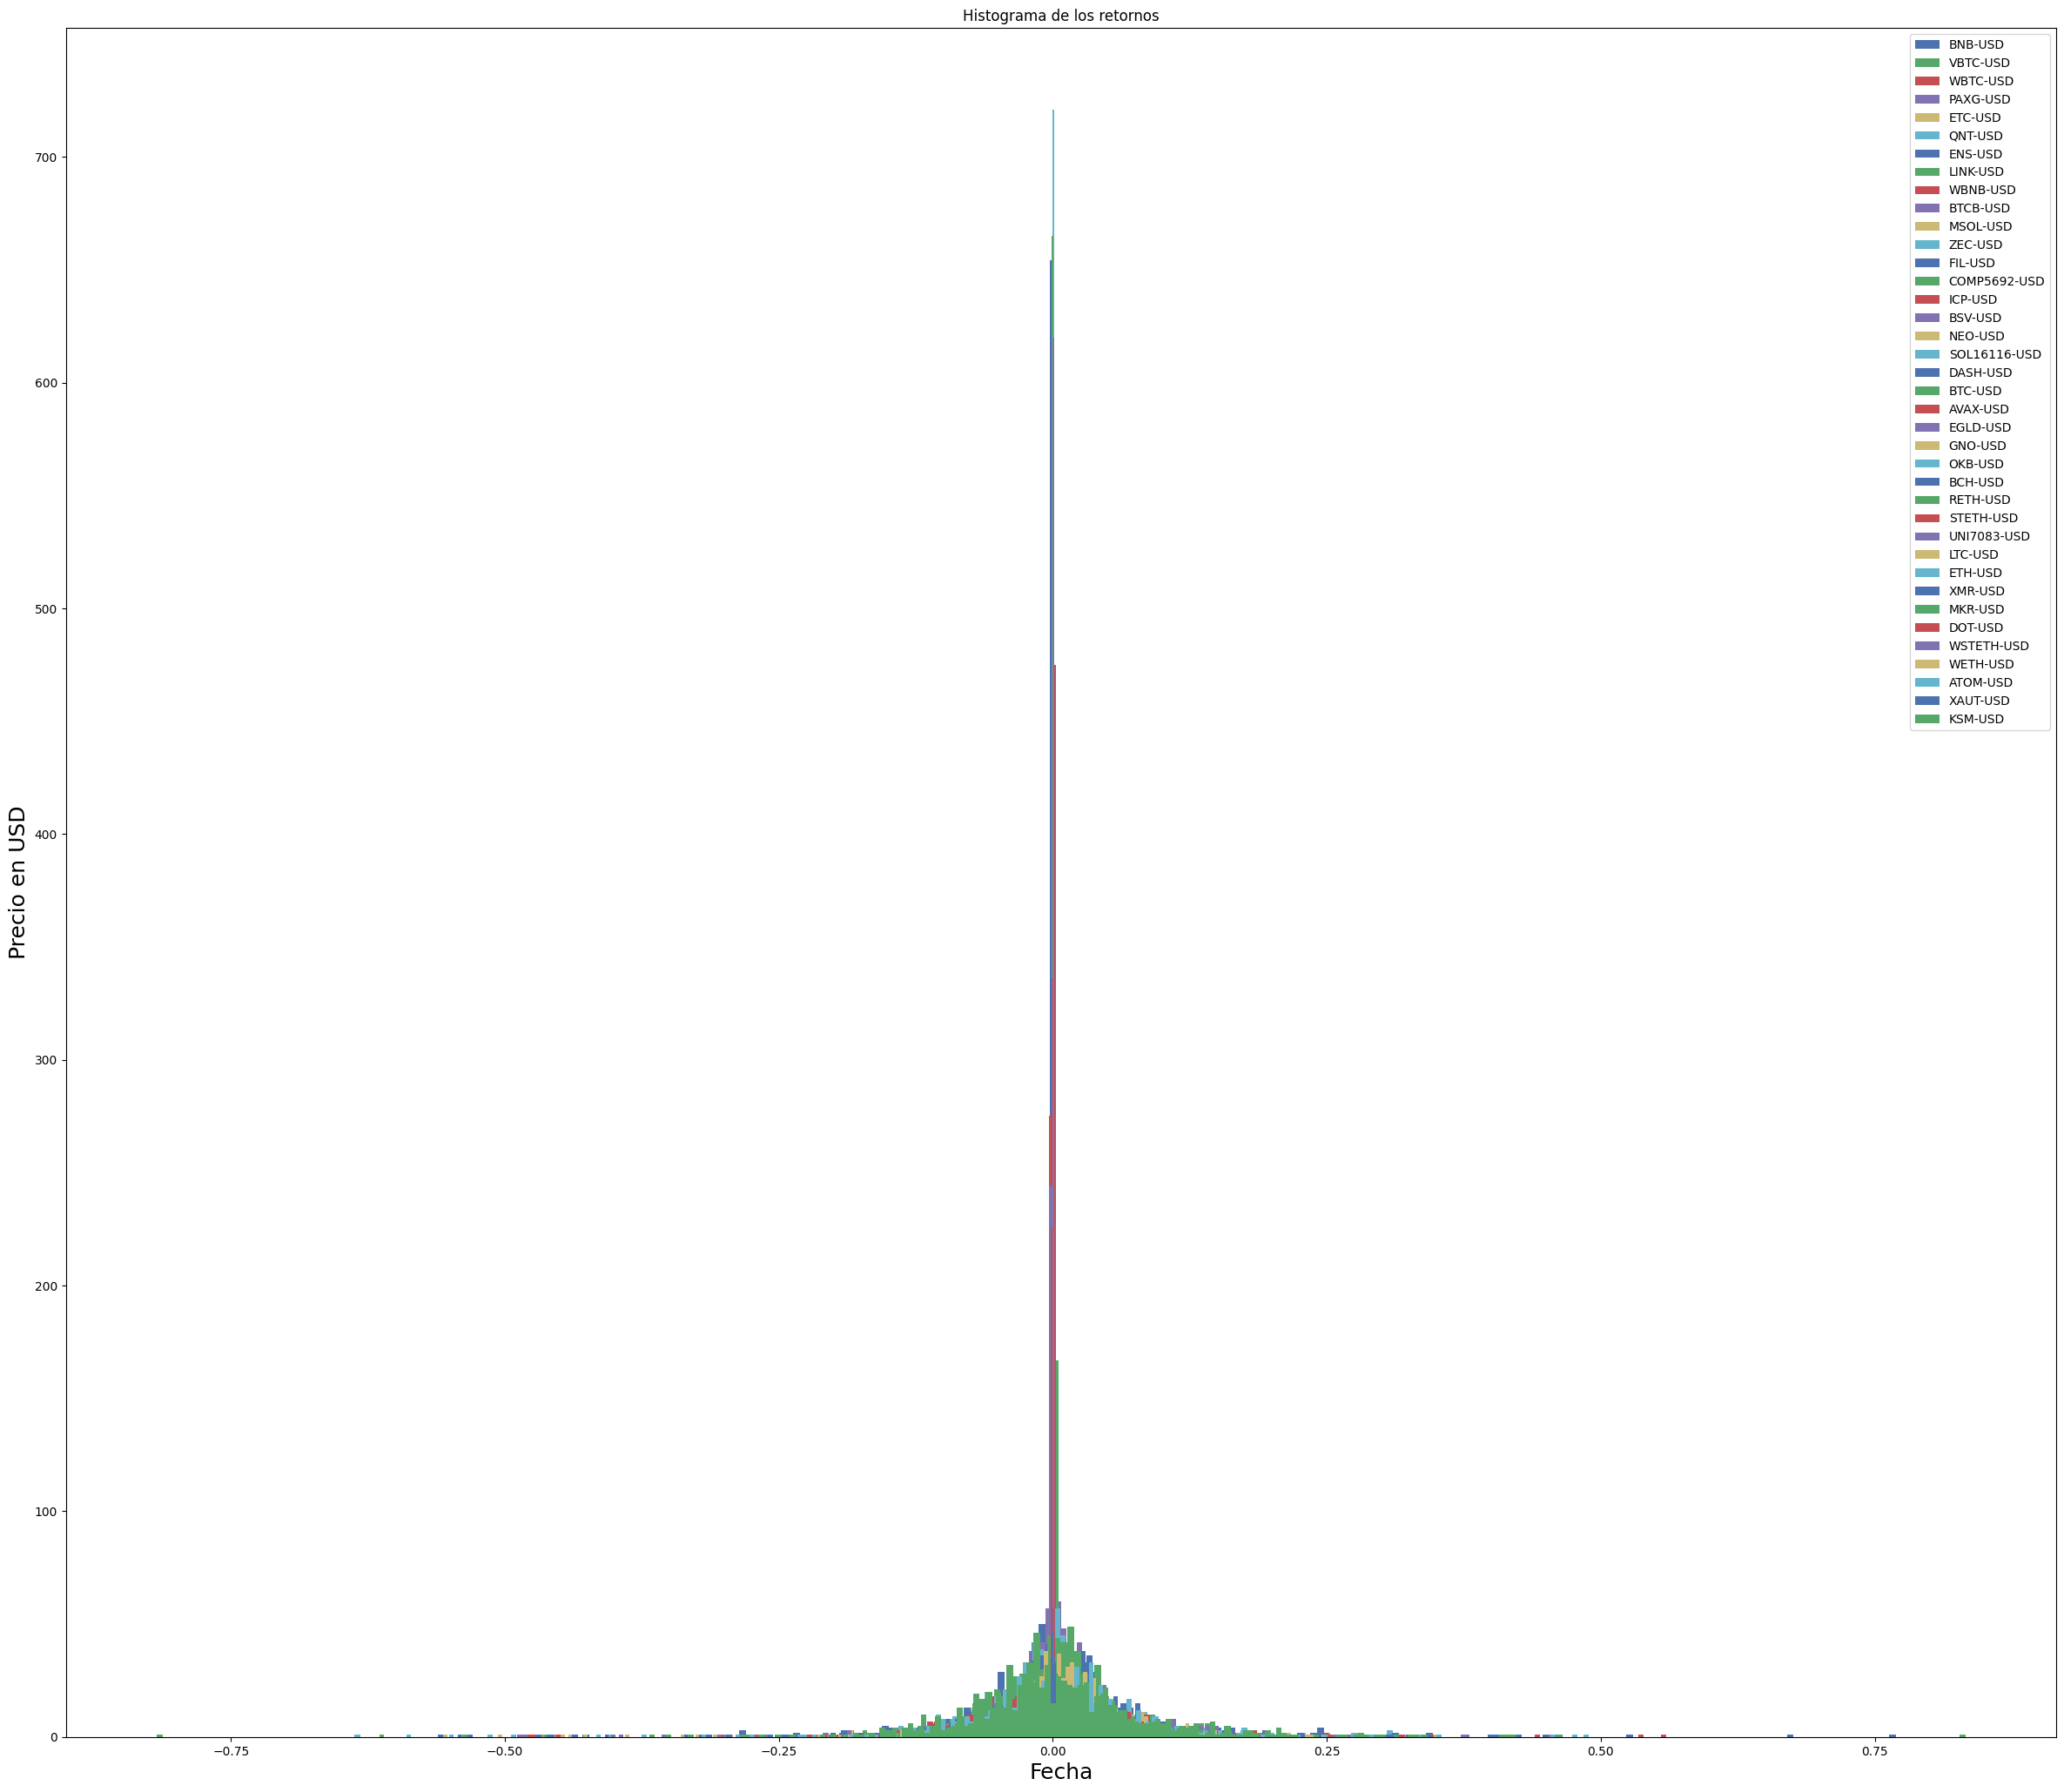

In [12]:
# HISTOGRAMA DE LOS RETORNOS

plt.figure(figsize=(29.5,25.5))
for i in dfc.columns.values:
    plt.hist( dfc[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(dfc.columns.values)
plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')

In [13]:
# INDICE DEL MERCADO CRIPTO

my_filepath2 = "/content/PerformanceGraphExport (2).xls"


df_ind = pd.DataFrame(pd.read_excel(my_filepath2,parse_dates= True,header=6, index_col=0))
df_ind = df_ind.dropna()
df_ind.index = pd.to_datetime(df_ind.index)
df_ind = df_ind.loc[ start:end]

df_ind.head()

S&P Cryptocurrency Broad Digital Market Index (USD)
Fecha                                                          
2020-01-28                                             660.83  
2020-01-29                                             682.97  
2020-01-30                                             700.76  
2020-01-31                                             680.91  
2020-02-03                                             689.54

In [14]:
# RETORNO LOGARITMICO INDICE

dfi = np.log(df_ind).diff()
dfi = dfi.dropna()
dfi


S&P Cryptocurrency Broad Digital Market Index (USD)
Fecha                                                          
2020-01-29                                           0.032954  
2020-01-30                                           0.025715  
2020-01-31                                          -0.028735  
2020-02-03                                           0.012595  
2020-02-04                                          -0.011611  
...                                                       ...  
2025-01-22                                          -0.013597  
2025-01-23                                          -0.013141  
2025-01-24                                           0.014371  
2025-01-27                                          -0.040874  
2025-01-28                                          -0.008671  

[1305 rows x 1 columns]

# ALTERNATIVA 1

In [52]:
# CAPM

import operator

result1 = []
expected_annual_return = []
annual_volatility = []
tipo_venta  = ""
max_sharpe = 0
S_op = 0
mu_op= 0


for i in tqdm(range(1000)):
    next_i = False
    while True:

        sharpes = []
        assets1 = []
        assets1 +=list(np.random.choice(dfc.columns, 7, replace=False))
        retornos1 = expected_returns.capm_return(dfc[assets1], market_prices = dfi, returns_data = True, risk_free_rate = 5.29/100, frequency=252, compounding= True, log_returns=True)
        S = risk_models.sample_cov(dfc[assets1], returns_data= True, frequency=252, log_returns= True) # Get the sample covariance matrix

        ef1 = EfficientFrontier(retornos1, S, weight_bounds=(0,1))
        ef2 = EfficientFrontier(retornos1, S, weight_bounds=(-1,1))
        ef3 = EfficientFrontier(retornos1, S, weight_bounds=(0,1))
        ef4 = EfficientFrontier(retornos1, S, weight_bounds=(-1,1))

        try :

            # PESOS (SIN VENTA CORTA, MINIMA VARIANZA)
            weights1 = ef1.min_volatility()
            # PESOS (CON VENTA CORTA, MINIMA VARIANZA)
            weights2 = ef2.min_volatility()
            # PESOS (SIN VENTA CORTA USANDO MAX_SHARPE)
            weights3 = ef3.max_sharpe(risk_free_rate=0.0529)
            # PESOS (CON VENTA CORTA USANDO MAX_SHARPE)
            weights4 = ef4.max_sharpe(risk_free_rate=5.29/100) #Maximize the Sharpe ratio, and get the raw weights

        except:
            continue
        else:
            cleaned_weights1 = ef1.clean_weights()
            cleaned_weights2 = ef2.clean_weights()
            cleaned_weights3 = ef3.clean_weights()
            cleaned_weights4 = ef4.clean_weights()
            cleaned_weights_ord = dict(sorted(cleaned_weights4.items(), key=operator.itemgetter(1),reverse=True))

            expected_annual_return1, annual_volatility1, sharpe_ratio1 = ef1.portfolio_performance(risk_free_rate=5.29/100)
            expected_annual_return2, annual_volatility2, sharpe_ratio2 = ef2.portfolio_performance(risk_free_rate=5.29/100)
            expected_annual_return3, annual_volatility3, sharpe_ratio3 = ef3.portfolio_performance(risk_free_rate=5.29/100)
            expected_annual_return4, annual_volatility4, sharpe_ratio4 = ef4.portfolio_performance(risk_free_rate=5.29/100)

            sharpes = [sharpe_ratio1, sharpe_ratio2, sharpe_ratio3, sharpe_ratio4]
            sharpes.sort(reverse= True)

            if sharpes[0] > max_sharpe:
                max_sharpe = sharpes[0]

                if sharpes[0] == sharpe_ratio1:
                    result1 = cleaned_weights1
                    expected_annual_return = expected_annual_return1
                    annual_volatility = annual_volatility1
                    tipo_venta = "SIN VENTA CORTA, MINIMA VARIANZA"
                else:
                    if sharpes[0] == sharpe_ratio2:
                        result1 = cleaned_weights2
                        expected_annual_return = expected_annual_return2
                        annual_volatility = annual_volatility2
                        tipo_venta = "CON VENTA CORTA, MINIMA VARIANZA"
                    else:
                        if sharpes[0] == sharpe_ratio3:
                            result1 = cleaned_weights3
                            expected_annual_return = expected_annual_return3
                            annual_volatility = annual_volatility3
                            tipo_venta = "SIN VENTA CORTA USANDO MAX_SHARPE"
                        else:
                            if sharpes[0] == sharpe_ratio4:
                                result1 = cleaned_weights4
                                expected_annual_return = expected_annual_return4
                                annual_volatility = annual_volatility4
                                tipo_venta = "CON VENTA CORTA USANDO MAX_SHARPE"
                            #else:
                                #continue

                mu_op = retornos1
                S_op = S
        break

#print(mu_op)
print(result1)
print('Expected annual return: {}%'.format((expected_annual_return*100).round(2)))
print('Annual volatility: {}%'.format((annual_volatility*100).round(2)))
print('Sharpe ratio: {}'.format(max_sharpe.round(2)))
print(tipo_venta)





100%|██████████| 1000/1000 [00:52<00:00, 18.94it/s]

OrderedDict([('BTC-USD', 0.41971), ('STETH-USD', 0.14385), ('KSM-USD', 0.03166), ('WBNB-USD', 0.03155), ('SOL16116-USD', 0.06436), ('QNT-USD', -0.02001), ('XAUT-USD', 0.32889)])
Expected annual return: 36.37%
Annual volatility: 37.3%
Sharpe ratio: 0.83
CON VENTA CORTA USANDO MAX_SHARPE


In [16]:
# PESOS IGUALES PARA TODOS LOS ACTIVOS SIN OPTIMIZAR

def pesosPortafolio(serie):
    p = []
    for w in serie:
        p.append(1/len(serie))
    arrayPesos = np.array(p)
    return arrayPesos

pesos = pesosPortafolio(mu_op)
pesos

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [17]:
# MATRIZ DE COVARIANZA DEL PORTAFOLIO SIN OPTIMIZAR

df_cov = df_log[mu_op.index].cov()*252
df_cov


MSOL-USD  XAUT-USD   LTC-USD   BTC-USD   QNT-USD   OKB-USD  \
MSOL-USD   0.117896  0.000580  0.065755  0.045819  0.062961  0.058345   
XAUT-USD   0.000580  0.021730  0.014823  0.010587  0.000091  0.010920   
LTC-USD    0.065755  0.014823  0.834933  0.483333  0.552129  0.539319   
BTC-USD    0.045819  0.010587  0.483333  0.423481  0.399082  0.384816   
QNT-USD    0.062961  0.000091  0.552129  0.399082  1.461686  0.436879   
OKB-USD    0.058345  0.010920  0.539319  0.384816  0.436879  1.202062   
STETH-USD  0.065570  0.006631  0.369063  0.237893  0.241290  0.291708   

           STETH-USD  
MSOL-USD    0.065570  
XAUT-USD    0.006631  
LTC-USD     0.369063  
BTC-USD     0.237893  
QNT-USD     0.241290  
OKB-USD     0.291708  
STETH-USD   0.421282

In [18]:
# VARIANZA DEL PORTAFOLIO SIN OPTIMIZAR

varianza_portafolio = pesos.T @ df_cov @ pesos

"La varianza del portafolio es:" + " " + str(round(varianza_portafolio*100,1))+"%"

'La varianza del portafolio es: 26.6%'

In [19]:
# VOLATILIDAD DEL PORTAFOLIO SIN OPTIMIZAR

volatilidad_portafolio = np.sqrt(varianza_portafolio)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad_portafolio*100,1))+"%"


'La volatilidad del portafolio es: 51.6%'

In [20]:
# RETORNO DEL PORTAFOLIO SIN OPTIMIZAR

retorno_portafolio = np.sum(pesos*mu_op)

'El retorno anual del portafolio es:' + ' ' + str(round(retorno_portafolio*100,3)) + '%'

'El retorno anual del portafolio es: 43.674%'

OrderedDict([('MSOL-USD', 0.0560944862623331), ('XAUT-USD', 0.3499250363569016), ('LTC-USD', 0.0478737497452636), ('BTC-USD', 0.3837555892116541), ('QNT-USD', -0.0225403977547536), ('OKB-USD', 0.0289797845284638), ('STETH-USD', 0.1559117516501374)])


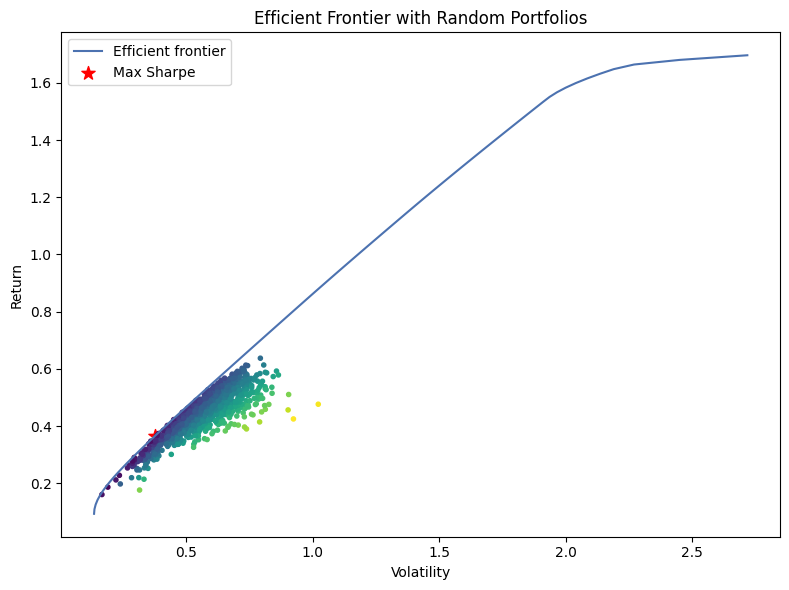

In [38]:
# GRAFICO FRONTERA EFICIENTE

!pip install PyPortfolioOpt --upgrade
from pypfopt import plotting

#import matplotlib.pyplot as plt

def plot_efficient_frontier_and_max_sharpe(r, cov):

    ef = EfficientFrontier(r, cov, weight_bounds=(-1,1))
    fig, ax = plt.subplots(figsize=(8,6))
    ef_max_sharpe = copy.deepcopy(ef)

    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

    # Find the max sharpe portfolio
    print(ef_max_sharpe.max_sharpe(risk_free_rate=5.29/100))
    ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance(risk_free_rate=5.29/100)
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

    # Generate random portfolios
    n_samples = 1000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)

    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

    # Output
    ax.set_title("Efficient Frontier with Random Portfolios")
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_efficient_frontier_and_max_sharpe(mu_op, S_op)

In [42]:
# CANTIDAD DE ACCIONES A COMPRAR

!pip install cvxopt  # for GLPK_MI

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df_prices[mu_op.index])
#latest_prices = get_latest_prices(df_log[retornos2.index])
#latest_prices = get_latest_prices(dfc[retornos2.index])
print(latest_prices)

#pesos1 = cleaned_weights
pesos1 = result1
da = DiscreteAllocation(pesos1, latest_prices, total_portfolio_value=5000)
allocation, leftover = da.lp_portfolio(solver='GLPK_MI')
print("Cantidad de acciones a comprar:", allocation)
print("Dinero sobrante: ${:.2f}".format(leftover))

MSOL-USD        296.027863
XAUT-USD       2717.848389
LTC-USD         114.898705
BTC-USD      102087.687500
QNT-USD         100.963150
OKB-USD          53.673054
STETH-USD      3169.812012
Name: 2025-01-27 00:00:00, dtype: float64
Cantidad de acciones a comprar: {'MSOL-USD': 1, 'XAUT-USD': 1, 'LTC-USD': 3, 'OKB-USD': 3, 'QNT-USD': -1}
Dinero sobrante: $1492.15


# ALTERNATIVA 2

In [53]:
# ALTERNATIVA 2
# FRONTERA EFICIENTE

import operator

result2 = []
expected_annual_return2 = []
annual_volatility2 = []
tipo_venta2  = ""
max_sharpe2 = 0
S_op2 = 0
mu_op2= 0


for i in tqdm(range(1000)):
    next_i = False
    while True:

        sharpes2 = []
        assets2 = []
        assets2 +=list(np.random.choice(dfc.columns, 7, replace=False))
        #mu = expected_returns.mean_historical_return(dfc[assets2],returns_data=True, compounding=True,
         #                                          frequency=252, log_returns= True) # returns.mean() * 252

        mu = expected_returns.mean_historical_return(df_prices[assets2],returns_data=False, compounding=True,
                                                   frequency=252, log_returns= True) # returns.mean() * 252
        S2 = risk_models.sample_cov(dfc[assets2], returns_data= True, frequency=252, log_returns= True) # Get the sample covariance matrix

        ef21 = EfficientFrontier(mu, S2, weight_bounds=(0,1))
        ef22 = EfficientFrontier(mu, S2, weight_bounds=(-1,1))
        ef23 = EfficientFrontier(mu, S2, weight_bounds=(0,1))
        ef24 = EfficientFrontier(mu, S2, weight_bounds=(-1,1))

        try :

            # PESOS (SIN VENTA CORTA, MINIMA VARIANZA)
            weights21 = ef21.min_volatility()
            # PESOS (CON VENTA CORTA, MINIMA VARIANZA)
            weights22 = ef22.min_volatility()
            # PESOS (SIN VENTA CORTA USANDO MAX_SHARPE)
            weights23 = ef23.max_sharpe(risk_free_rate=0.0529)
            # PESOS (CON VENTA CORTA USANDO MAX_SHARPE)
            weights24 = ef24.max_sharpe(risk_free_rate=5.29/100) #Maximize the Sharpe ratio, and get the raw weights

        except:
            continue
        else:
            cleaned_weights21 = ef21.clean_weights()
            cleaned_weights22 = ef22.clean_weights()
            cleaned_weights23 = ef23.clean_weights()
            cleaned_weights24 = ef24.clean_weights()
            cleaned_weights_ord = dict(sorted(cleaned_weights24.items(), key=operator.itemgetter(1),reverse=True))

            expected_annual_return21, annual_volatility21, sharpe_ratio21 = ef21.portfolio_performance(risk_free_rate=5.29/100)
            expected_annual_return22, annual_volatility22, sharpe_ratio22 = ef22.portfolio_performance(risk_free_rate=5.29/100)
            expected_annual_return23, annual_volatility23, sharpe_ratio23 = ef23.portfolio_performance(risk_free_rate=5.29/100)
            expected_annual_return24, annual_volatility24, sharpe_ratio24 = ef24.portfolio_performance(risk_free_rate=5.29/100)

            sharpes2 = [sharpe_ratio21, sharpe_ratio22, sharpe_ratio23, sharpe_ratio24]
            sharpes2.sort(reverse= True)

            if sharpes2[0] > max_sharpe2:
                max_sharpe2 = sharpes2[0]

                if sharpes2[0] == sharpe_ratio21:
                    result2 = cleaned_weights21
                    expected_annual_return2 = expected_annual_return21
                    annual_volatility2 = annual_volatility21
                    tipo_venta2 = "SIN VENTA CORTA, MINIMA VARIANZA"
                else:
                    if sharpes2[0] == sharpe_ratio22:
                        result2 = cleaned_weights22
                        expected_annual_return2 = expected_annual_return22
                        annual_volatility2 = annual_volatility2
                        tipo_venta2 = "CON VENTA CORTA, MINIMA VARIANZA"
                    else:
                        if sharpes2[0] == sharpe_ratio23:
                            result2 = cleaned_weights23
                            expected_annual_return2 = expected_annual_return23
                            annual_volatility2 = annual_volatility23
                            tipo_venta2 = "SIN VENTA CORTA USANDO MAX_SHARPE"
                        else:
                            if sharpes2[0] == sharpe_ratio24:
                                result2 = cleaned_weights24
                                expected_annual_return2 = expected_annual_return24
                                annual_volatility2 = annual_volatility24
                                tipo_venta2 = "CON VENTA CORTA USANDO MAX_SHARPE"
                            #else:
                                #continue

                mu_op2 = mu
                S_op2 = S2
        break

print('Retornos', mu_op2)
print('Pesos', result2)
print('Expected annual return: {}%'.format((expected_annual_return2*100).round(2)))
print('Annual volatility: {}%'.format((annual_volatility2*100).round(2)))
print('Sharpe ratio: {}'.format(max_sharpe2.round(2)))
print(tipo_venta2)


  0%|          | 2/1000 [00:00<01:15, 13.26it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  1%|          | 6/1000 [00:00<02:19,  7.13it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  1%|          | 10/1000 [00:01<01:36, 10.21it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  1%|          | 12/1000 [00:01<01:21, 12.20it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  2%|▏         | 16/1000 [00:01<01:43,  9.49it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  2%|▏         | 22/1000 [00:02<01:20, 12.09it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  3%|▎         | 26/1000 [00:02<01:15, 12.84it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  3%|▎         | 28/1000 [00:02<01:18, 12.35it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  3%|▎         | 32/1000 [00:02<01:18, 12.31it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  4%|▎         | 36/1000 [00:03<01:10, 13.69it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  4%|▍         | 40/1000 [00:03<01:22, 11.64it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  4%|▍         | 42/1000 [00:03<01:39,  9.62it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  4%|▍         | 44/1000 [00:04<01:41,  9.43it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  5%|▍         | 46/1000 [00:04<01:41,  9.41it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  5%|▌         | 50/1000 [00:04<01:21, 11.59it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  5%|▌         | 54/1000 [00:04<01:11, 13.22it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  6%|▌         | 58/1000 [00:05<01:13, 12.75it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  6%|▌         | 62/1000 [00:05<01:09, 13.44it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  7%|▋         | 72/1000 [00:06<00:59, 15.72it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  7%|▋         | 74/1000 [00:06<01:43,  8.93it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  8%|▊         | 78/1000 [00:06<01:26, 10.62it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  8%|▊         | 82/1000 [00:07<01:40,  9.09it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  9%|▉         | 88/1000 [00:08<01:47,  8.47it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


  9%|▉         | 90/1000 [00:08<01:35,  9.57it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

  9%|▉         | 92/1000 [00:08<02:29,  6.09it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 10%|█         | 100/1000 [00:09<01:33,  9.66it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 10%|█         | 103/1000 [00:09<01:40,  8.93it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 11%|█         | 106/1000 [00:10<01:44,  8.58it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 11%|█         | 110/1000 [00:10<01:32,  9.62it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 12%|█▏        | 115/1000 [00:11<01:22, 10.73it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 12%|█▏        | 119/1000 [00:11<01:13, 12.05it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 12%|█▏        | 124/1000 [00:11<01:12, 12.13it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 13%|█▎        | 128/1000 [00:12<01:07, 12.88it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 13%|█▎        | 132/1000 [00:12<01:00, 14.41it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 13%|█▎        | 134/1000 [00:12<01:21, 10.69it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 14%|█▎        | 136/1000 [00:12<01:23, 10.32it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 14%|█▍        | 141/1000 [00:13<01:04, 13.30it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 15%|█▍        | 147/1000 [00:13<00:55, 15.40it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 15%|█▌        | 151/1000 [00:13<00:58, 14.55it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 16%|█▌        | 157/1000 [00:14<00:54, 15.60it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 16%|█▋        | 163/1000 [00:14<01:05, 12.81it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

 16%|█▋        | 165/1000 [00:14<01:29,  9.33it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 17%|█▋        | 171/1000 [00:15<01:05, 12.68it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 18%|█▊        | 177/1000 [00:15<01:03, 12.89it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 18%|█▊        | 183/1000 [00:16<00:55, 14.83it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 19%|█▉        | 189/1000 [00:16<01:02, 13.04it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 19%|█▉        | 191/1000 [00:16<01:07, 12.04it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 20%|█▉        | 197/1000 [00:17<01:00, 13.26it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 20%|██        | 201/1000 [00:17<00:58, 13.76it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 20%|██        | 205/1000 [00:17<00:58, 13.55it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 21%|██        | 209/1000 [00:18<01:07, 11.72it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 21%|██▏       | 213/1000 [00:18<00:57, 13.63it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 22%|██▏       | 215/1000 [00:18<00:53, 14.72it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 22%|██▏       | 221/1000 [00:19<01:07, 11.57it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 22%|██▏       | 223/1000 [00:19<01:16, 10.16it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 22%|██▎       | 225/1000 [00:19<01:34,  8.16it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 23%|██▎       | 226/1000 [00:19<01:45,  7.36it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 23%|██▎       | 228/1000 [00:20<01:36,  7.98it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 23%|██▎       | 232/1000 [00:20<01:34,  8.10it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 23%|██▎       | 233/1000 [00:20<01:36,  7.93it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 24%|██▎       | 237/1000 [00:21<01:27,  8.70it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 24%|██▍       | 243/1000 [00:21<01:15, 10.01it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 25%|██▍       | 249/1000 [00:22<01:27,  8.62it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 25%|██▌       | 250/1000 [00:22<01:46,  7.05it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 26%|██▌       | 259/1000 [00:23<00:54, 13.56it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 26%|██▋       | 263/1000 [00:23<00:49, 14.75it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 27%|██▋       | 267/1000 [00:23<00:54, 13.43it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 27%|██▋       | 269/1000 [00:23<00:54, 13.43it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 27%|██▋       | 273/1000 [00:24<01:01, 11.78it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 28%|██▊       | 275/1000 [00:24<00:59, 12.14it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 28%|██▊       | 278/1000 [00:24<01:17,  9.32it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 28%|██▊       | 282/1000 [00:25<01:06, 10.82it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 30%|██▉       | 296/1000 [00:26<00:46, 15.18it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 30%|██▉       | 298/1000 [00:26<00:57, 12.16it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 30%|███       | 305/1000 [00:26<00:55, 12.44it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 31%|███       | 307/1000 [00:26<00:57, 11.96it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 31%|███▏      | 313/1000 [00:27<00:49, 13.91it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 32%|███▏      | 317/1000 [00:27<00:44, 15.33it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 32%|███▏      | 321/1000 [00:28<00:57, 11.79it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 33%|███▎      | 334/1000 [00:28<00:43, 15.38it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 34%|███▎      | 336/1000 [00:29<00:59, 11.15it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 34%|███▍      | 342/1000 [00:29<00:45, 14.39it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 35%|███▍      | 346/1000 [00:29<00:46, 14.03it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 35%|███▍      | 348/1000 [00:30<00:51, 12.76it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 36%|███▌      | 356/1000 [00:30<00:42, 15.09it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 36%|███▌      | 359/1000 [00:30<00:42, 15.08it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 36%|███▌      | 362/1000 [00:31<00:48, 13.23it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 37%|███▋      | 370/1000 [00:31<00:43, 14.61it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 38%|███▊      | 375/1000 [00:31<00:38, 16.08it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 38%|███▊      | 379/1000 [00:32<00:38, 15.94it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 38%|███▊      | 385/1000 [00:32<00:42, 14.49it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 39%|███▊      | 387/1000 [00:32<00:47, 12.83it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 39%|███▉      | 391/1000 [00:33<00:56, 10.76it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 39%|███▉      | 393/1000 [00:33<00:58, 10.44it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 40%|███▉      | 395/1000 [00:33<01:14,  8.08it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 40%|███▉      | 397/1000 [00:34<01:19,  7.55it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 40%|████      | 401/1000 [00:34<01:08,  8.74it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 40%|████      | 404/1000 [00:34<01:11,  8.29it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 40%|████      | 405/1000 [00:35<01:33,  6.35it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 41%|████      | 406/1000 [00:35<01:50,  5.36it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 41%|████      | 409/1000 [00:35<01:25,  6.91it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 41%|████      | 411/1000 [00:36<01:29,  6.56it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 42%|████▏     | 417/1000 [00:36<01:03,  9.15it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

 42%|████▏     | 421/1000 [00:37<01:01,  9.42it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 42%|████▏     | 423/1000 [00:37<01:13,  7.84it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 43%|████▎     | 427/1000 [00:37<01:06,  8.60it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

 43%|████▎     | 431/1000 [00:38<01:04,  8.80it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 43%|████▎     | 433/1000 [00:38<01:02,  9.11it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 44%|████▎     | 437/1000 [00:38<00:50, 11.07it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 44%|████▍     | 441/1000 [00:39<00:48, 11.48it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 44%|████▍     | 445/1000 [00:39<00:42, 13.14it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 46%|████▌     | 455/1000 [00:40<00:40, 13.48it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 46%|████▌     | 457/1000 [00:40<00:43, 12.53it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 46%|████▌     | 459/1000 [00:40<00:48, 11.09it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 46%|████▋     | 465/1000 [00:41<00:39, 13.69it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 47%|████▋     | 471/1000 [00:41<00:37, 14.29it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 48%|████▊     | 477/1000 [00:41<00:43, 12.13it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 48%|████▊     | 482/1000 [00:42<00:35, 14.60it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 49%|████▉     | 488/1000 [00:42<00:33, 15.21it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 49%|████▉     | 492/1000 [00:42<00:36, 13.75it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 50%|█████     | 504/1000 [00:43<00:38, 12.95it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 51%|█████     | 506/1000 [00:44<00:44, 11.11it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 51%|█████     | 510/1000 [00:44<00:37, 12.90it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 51%|█████     | 512/1000 [00:44<00:34, 14.00it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

 51%|█████▏    | 514/1000 [00:44<00:48,  9.98it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 52%|█████▏    | 516/1000 [00:44<00:46, 10.47it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 52%|█████▏    | 518/1000 [00:45<00:56,  8.49it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 52%|█████▏    | 520/1000 [00:45<00:56,  8.52it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 52%|█████▏    | 523/1000 [00:45<00:46, 10.35it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 52%|█████▎    | 525/1000 [00:46<00:56,  8.34it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 53%|█████▎    | 531/1000 [00:46<00:43, 10.90it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 54%|█████▎    | 535/1000 [00:46<00:48,  9.53it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 54%|█████▎    | 537/1000 [00:47<00:45, 10.24it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 54%|█████▍    | 539/1000 [00:47<00:56,  8.18it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 54%|█████▍    | 542/1000 [00:47<00:53,  8.50it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 55%|█████▍    | 546/1000 [00:48<00:47,  9.56it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 55%|█████▍    | 548/1000 [00:48<00:47,  9.52it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 55%|█████▌    | 552/1000 [00:48<00:45,  9.88it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 56%|█████▌    | 556/1000 [00:49<00:45,  9.85it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

 56%|█████▌    | 561/1000 [00:50<01:01,  7.15it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 57%|█████▋    | 567/1000 [00:50<00:37, 11.42it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 57%|█████▋    | 572/1000 [00:50<00:34, 12.48it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 57%|█████▋    | 574/1000 [00:51<00:37, 11.29it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 58%|█████▊    | 576/1000 [00:51<00:37, 11.19it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 58%|█████▊    | 582/1000 [00:51<00:35, 11.74it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 58%|█████▊    | 584/1000 [00:51<00:36, 11.37it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 59%|█████▊    | 586/1000 [00:52<00:34, 11.95it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 59%|█████▉    | 590/1000 [00:52<00:40, 10.21it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 59%|█████▉    | 592/1000 [00:52<00:36, 11.17it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 60%|█████▉    | 597/1000 [00:53<00:31, 12.66it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

 61%|██████    | 606/1000 [00:53<00:29, 13.54it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 61%|██████    | 610/1000 [00:54<00:30, 12.67it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 62%|██████▏   | 616/1000 [00:54<00:30, 12.48it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 62%|██████▏   | 620/1000 [00:54<00:29, 12.88it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 63%|██████▎   | 629/1000 [00:55<00:25, 14.43it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 63%|██████▎   | 631/1000 [00:55<00:36, 10.22it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 64%|██████▎   | 636/1000 [00:55<00:27, 13.15it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 64%|██████▍   | 644/1000 [00:56<00:26, 13.36it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 65%|██████▍   | 646/1000 [00:56<00:26, 13.41it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 65%|██████▌   | 650/1000 [00:57<00:29, 11.99it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 65%|██████▌   | 652/1000 [00:57<00:27, 12.52it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 66%|██████▌   | 656/1000 [00:57<00:29, 11.61it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 66%|██████▌   | 658/1000 [00:57<00:29, 11.48it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 66%|██████▌   | 660/1000 [00:57<00:31, 10.78it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 67%|██████▋   | 667/1000 [00:58<00:25, 13.23it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 67%|██████▋   | 671/1000 [00:58<00:30, 10.85it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 68%|██████▊   | 675/1000 [00:59<00:26, 12.13it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 68%|██████▊   | 679/1000 [00:59<00:26, 12.22it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 68%|██████▊   | 683/1000 [00:59<00:25, 12.28it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 68%|██████▊   | 685/1000 [00:59<00:23, 13.68it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 69%|██████▊   | 687/1000 [01:00<00:31,  9.95it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 69%|██████▉   | 693/1000 [01:00<00:31,  9.89it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 70%|██████▉   | 697/1000 [01:01<00:30, 10.02it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 70%|███████   | 705/1000 [01:02<00:28, 10.27it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 71%|███████   | 711/1000 [01:02<00:25, 11.40it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 72%|███████▏  | 715/1000 [01:03<00:29,  9.64it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 72%|███████▏  | 718/1000 [01:03<00:34,  8.19it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 72%|███████▏  | 719/1000 [01:03<00:36,  7.80it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 72%|███████▎  | 725/1000 [01:03<00:23, 11.94it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 73%|███████▎  | 729/1000 [01:04<00:24, 11.16it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 73%|███████▎  | 733/1000 [01:04<00:21, 12.27it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 74%|███████▎  | 735/1000 [01:04<00:21, 12.17it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 74%|███████▎  | 737/1000 [01:05<00:24, 10.85it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 74%|███████▍  | 743/1000 [01:05<00:33,  7.73it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 75%|███████▍  | 749/1000 [01:06<00:22, 11.25it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 76%|███████▌  | 755/1000 [01:06<00:18, 13.12it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 76%|███████▌  | 759/1000 [01:07<00:22, 10.93it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 76%|███████▋  | 765/1000 [01:07<00:17, 13.16it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 77%|███████▋  | 771/1000 [01:07<00:16, 13.97it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 77%|███████▋  | 773/1000 [01:08<00:16, 13.64it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 78%|███████▊  | 781/1000 [01:08<00:14, 15.16it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 78%|███████▊  | 783/1000 [01:08<00:16, 13.24it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 79%|███████▉  | 789/1000 [01:09<00:16, 12.86it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 79%|███████▉  | 793/1000 [01:09<00:15, 13.79it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 80%|███████▉  | 795/1000 [01:09<00:19, 10.68it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 80%|███████▉  | 797/1000 [01:09<00:21,  9.64it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 81%|████████  | 807/1000 [01:10<00:13, 14.17it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 81%|████████  | 809/1000 [01:10<00:16, 11.89it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 81%|████████▏ | 813/1000 [01:11<00:16, 11.56it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 82%|████████▏ | 817/1000 [01:11<00:15, 12.20it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 82%|████████▏ | 821/1000 [01:11<00:12, 13.82it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 83%|████████▎ | 827/1000 [01:12<00:12, 13.83it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 84%|████████▎ | 836/1000 [01:12<00:11, 14.85it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 84%|████████▍ | 838/1000 [01:13<00:11, 14.20it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 84%|████████▍ | 842/1000 [01:13<00:14, 10.97it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 85%|████████▌ | 850/1000 [01:14<00:16,  9.01it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 86%|████████▌ | 860/1000 [01:15<00:12, 11.25it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 86%|████████▌ | 862/1000 [01:15<00:13, 10.17it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 87%|████████▋ | 874/1000 [01:16<00:12,  9.98it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 88%|████████▊ | 878/1000 [01:16<00:11, 11.08it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 88%|████████▊ | 880/1000 [01:17<00:15,  7.53it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 88%|████████▊ | 882/1000 [01:17<00:13,  8.61it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 89%|████████▊ | 886/1000 [01:17<00:12,  9.45it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 89%|████████▉ | 892/1000 [01:18<00:09, 10.94it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 89%|████████▉ | 894/1000 [01:18<00:10, 10.54it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 90%|█████████ | 904/1000 [01:19<00:07, 12.57it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 91%|█████████ | 910/1000 [01:19<00:06, 13.54it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 92%|█████████▏| 916/1000 [01:20<00:05, 14.72it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 92%|█████████▏| 920/1000 [01:20<00:05, 14.23it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 92%|█████████▏| 922/1000 [01:20<00:05, 13.62it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 93%|█████████▎| 926/1000 [01:21<00:06, 12.17it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 93%|█████████▎| 928/1000 [01:21<00:05, 12.41it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 93%|█████████▎| 930/1000 [01:21<00:05, 12.40it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 93%|█████████▎| 934/1000 [01:21<00:06, 10.90it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 94%|█████████▍| 938/1000 [01:22<00:05, 11.75it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 94%|█████████▍| 944/1000 [01:22<00:04, 13.61it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 95%|█████████▍| 946/1000 [01:22<00:04, 12.69it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 95%|█████████▌| 952/1000 [01:23<00:03, 13.42it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 95%|█████████▌| 954/1000 [01:23<00:03, 12.82it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 96%|█████████▌| 960/1000 [01:24<00:04,  9.17it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 97%|█████████▋| 966/1000 [01:24<00:03, 10.64it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 98%|█████████▊| 975/1000 [01:25<00:01, 14.01it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 98%|█████████▊| 979/1000 [01:25<00:01, 13.33it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 99%|█████████▉| 988/1000 [01:25<00:00, 14.19it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 99%|█████████▉| 990/1000 [01:26<00:00, 13.05it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


 99%|█████████▉| 994/1000 [01:26<00:00, 12.70it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


100%|█████████▉| 996/1000 [01:26<00:00, 13.89it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

100%|█████████▉| 998/1000 [01:27<00:00,  7.72it/s]

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


100%|██████████| 1000/1000 [01:27<00:00, 11.45it/s]

Retornos ETH-USD     0.148675
XAUT-USD    0.068614
NEO-USD    -0.318693
BTC-USD     0.193196
ICP-USD    -0.582159
BNB-USD     0.239975
LTC-USD    -0.194243
dtype: float64
Pesos OrderedDict([('ETH-USD', 0.5521), ('XAUT-USD', 1.0), ('NEO-USD', -0.53904), ('BTC-USD', 1.0), ('ICP-USD', -0.62499), ('BNB-USD', 0.40041), ('LTC-USD', -0.78848)])
Expected annual return: 112.88%
Annual volatility: 81.46%
Sharpe ratio: 1.32
CON VENTA CORTA USANDO MAX_SHARPE


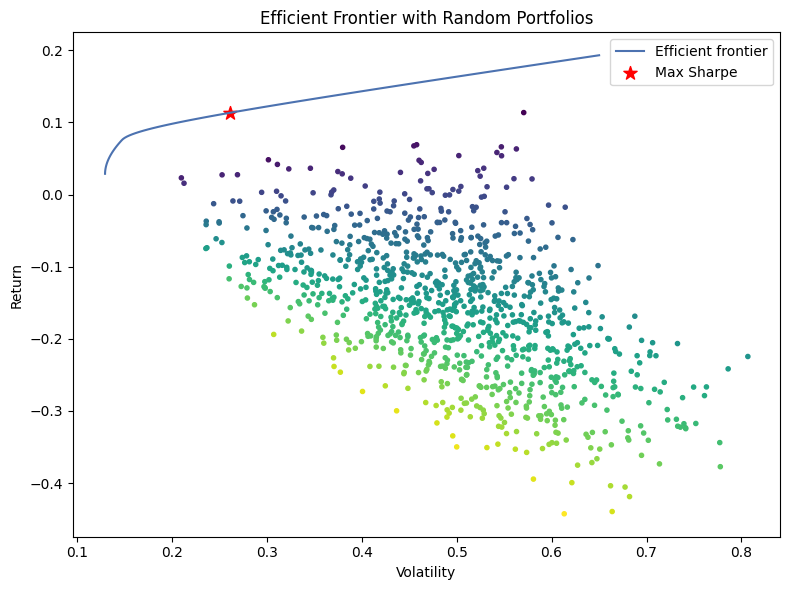

In [43]:
# GRAFICO FRONTERA EFICIENTE

def plot_efficient_frontier_and_max_sharpe(mu, S):

    ef = EfficientFrontier(mu, S)
    fig, ax = plt.subplots(figsize=(8,6))
    ef_max_sharpe = copy.deepcopy(ef)
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

    # Find the max sharpe portfolio
    ef_max_sharpe.max_sharpe(risk_free_rate=5.29/100)
    ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance(risk_free_rate=5.29/100)
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

    # Generate random portfolios
    n_samples = 1000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    #print(rets[:6])

    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

    # Output
    ax.set_title("Efficient Frontier with Random Portfolios")
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_efficient_frontier_and_max_sharpe(mu_op2, S_op2)

In [44]:
# PESOS A COLUMNAS

weights_df = pd.DataFrame.from_dict(result2, orient = 'index')
weights_df.columns = ['weights']
weights_df

weights
WSTETH-USD  -0.28975
BSV-USD     -0.60222
UNI7083-USD -0.18456
ICP-USD     -0.55346
STETH-USD    0.63000
XAUT-USD     1.00000
BTC-USD      1.00000

In [51]:
# CANTIDAD DE ACCIONES A COMPRAR


latest_prices = discrete_allocation.get_latest_prices(df_prices[weights_df.index])
#print(df_prices[weights_df.index])
#latest_prices = discrete_allocation.get_latest_prices(df[weights_df.index])
# Allocate Portfolio Value in $ as required to show number of shares/stocks to buy, also bounds for shorting will affect allocation
#Min Volatility Portfolio Allocation $5000
allocation_minv, rem_minv = discrete_allocation.DiscreteAllocation(result2, latest_prices, total_portfolio_value=5000).lp_portfolio(solver='GLPK_MI')
print(allocation_minv)
print("Leftover Fund value in$ after building minimum volatility portfolio is ${:.2f}".format(rem_minv))

{'XAUT-USD': 1, 'BSV-USD': -63, 'UNI7083-USD': -85, 'ICP-USD': -312}
Leftover Fund value in$ after building minimum volatility portfolio is $3665.94
